In [1]:
# Importing the libraries
from DBN import DBN
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [3]:
mnist_data.data = (mnist_data.data.type(torch.FloatTensor)/255).bernoulli()

The number shown is the number: 2


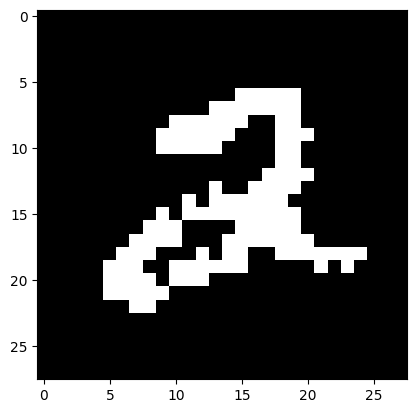

In [4]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.data[idx]
print("The number shown is the number: {}".format(mnist_data.targets[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [5]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
dbn_mnist = DBN(visible_units=28*28 ,
                hidden_units=[23*23 ,23*23, 18*18] ,
                k = 5,
                learning_rate = 0.01,
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False)

In [6]:
num_epochs = 1
batch_size = 10

dbn_mnist.train_static(mnist_data.data,mnist_data.targets, num_epochs , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 6000it [00:36, 166.05it/s]
Epoch:1 ,avg_cost = 0.5683265328407288 ,std_cost = 0.11032547056674957 ,avg_grad = 12049.7890625 ,std_grad = 2002.13720703125
--------------------
Training the 2 st rbm layer
RBM fitting: 6000it [00:27, 217.56it/s]
Epoch:1 ,avg_cost = 1.5785415172576904 ,std_cost = 0.1632649451494217 ,avg_grad = 19343.2421875 ,std_grad = 891.009521484375
--------------------
Training the 3 st rbm layer
RBM fitting: 6000it [00:24, 242.56it/s]
Epoch:1 ,avg_cost = 1.6010076999664307 ,std_cost = 0.15459607541561127 ,avg_grad = 12363.427734375 ,std_grad = 445.3240051269531


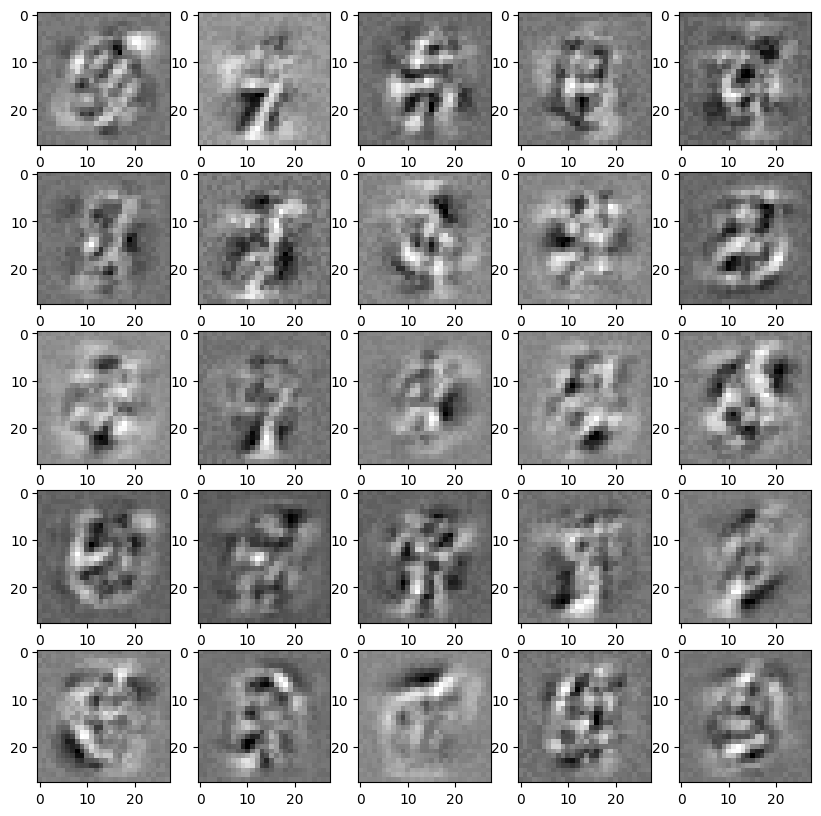

In [7]:
# visualising layer 1
learned_weights = dbn_mnist.rbm_layers[0].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

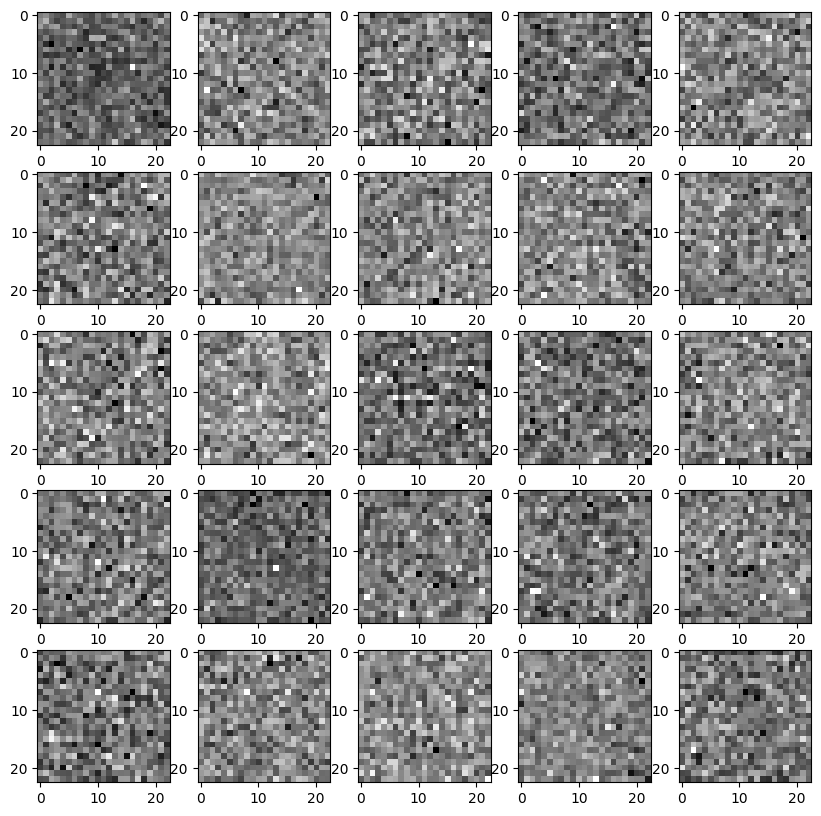

In [8]:
# visualising layer 2
learned_weights = dbn_mnist.rbm_layers[1].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((23,23)), cmap=plt.cm.gray)
plt.show()

In [9]:
number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.targets[i] == number):
        particular_mnist.append(mnist_data.data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [10]:
train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [11]:
dbn_mnist.train_static(train_data,train_label,30 , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 542it [00:02, 213.84it/s]
Epoch:1 ,avg_cost = 0.5113602876663208 ,std_cost = 0.04502591863274574 ,avg_grad = 10727.333984375 ,std_grad = 556.8745727539062
RBM fitting: 542it [00:02, 223.10it/s]
Epoch:2 ,avg_cost = 0.48641031980514526 ,std_cost = 0.043748192489147186 ,avg_grad = 10574.8203125 ,std_grad = 540.9354858398438
RBM fitting: 542it [00:02, 226.57it/s]
Epoch:3 ,avg_cost = 0.4778226315975189 ,std_cost = 0.04077005758881569 ,avg_grad = 10599.716796875 ,std_grad = 524.4431762695312
RBM fitting: 542it [00:02, 205.86it/s]
Epoch:4 ,avg_cost = 0.4725346267223358 ,std_cost = 0.04172169789671898 ,avg_grad = 10576.5869140625 ,std_grad = 528.1383666992188
RBM fitting: 542it [00:02, 196.38it/s]
Epoch:5 ,avg_cost = 0.4682310223579407 ,std_cost = 0.041063323616981506 ,avg_grad = 10571.046875 ,std_grad = 529.78173828125
RBM fitting: 542it [00:02, 193.43it/s]
Epoch:6 ,avg_cost = 0.4665793776512146 ,std_cost = 0.04196075350046158 ,avg

The original number: 1


/home/huzuntao/PycharmProjects/DBN-AE/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/huzuntao/PycharmProjects/DBN-AE/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


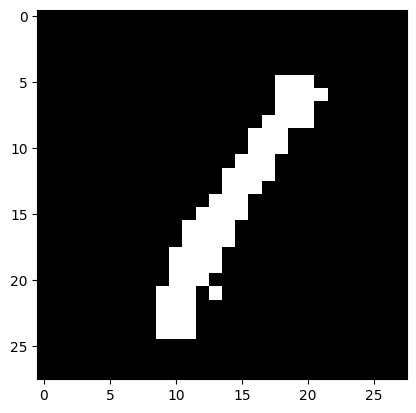

The reconstructed image


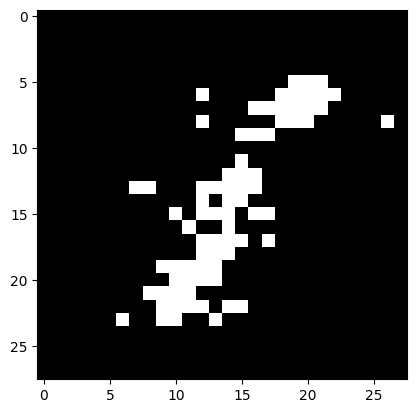

In [12]:
idx = 3
img = mnist_data.train_data[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= dbn_mnist.reconstruct(reconstructed_img)

reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()